<a href="https://colab.research.google.com/github/m8888e/INSE6220-PROJECT/blob/main/INSE_6220_Food_data_PCA_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [2]:
# install slim version (default)
!pip install pycaret

In [1]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

**Install Analysis Extras for Explainable AI**

In [3]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

Descriptive Explanation of the Dataset
The dataset contains 900 rows and 8 columns. Below is a detailed explanation of each column, its meaning, and data type:
It has been taken from kaggle.
Region (int64):

This column represents a unique identifier for a particular region where the food sample or observation was collected.
Example values: 87524, 75166, 90856.
MajorLength (float64):

This represents the major length of the food item or object being measured, likely referring to its largest dimension.
Example values: 442.25, 406.69, 352.19.
MinorLength (float64):

This column measures the minor length of the food item or object, referring to its smaller dimension perpendicular to the major length.
Example values: 253.29, 243.03, 290.82.
Elongation (float64):

Elongation is a ratio or calculated metric that indicates how elongated the object is. This is typically computed as a relationship between the major and minor lengths.
Example values: 0.819, 0.801, 0.564.
Convex Region (int64):

This represents the total size or area of the convex region around the food object, likely derived from geometric analysis.
Example values: 90546, 78789, 93717.
Spread (float64):

Spread measures how much the object or food sample is spread out. It might be a normalized or relative value.
Example values: 0.758, 0.684, 0.792.
Boundary length (float64):

This indicates the total perimeter or length of the boundary of the food object. It quantifies the outline of the object in the dataset.
Example values: 1184.04, 1121.78, 1073.25.
class (int64):

This is a target column representing the class or category of the food object. The class likely indicates classification labels such as food types or categories.
Example values: 0 (indicating the label).


**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/m8888e/INSE6220-PROJECT/refs/heads/main/FoodDataset.csv')
df.head(25)

Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0    87524   442.246011   253.291155    0.819738          90546  0.758651   
1    75166   406.690687   243.032436    0.801805          78789  0.684130   
2    90856   442.267048   266.328318    0.798354          93717  0.637613   
3    45928   286.540559   208.760042    0.684989          47336  0.699599   
4    79408   352.190770   290.827533    0.564011          81463  0.792772   
5    49242   318.125407   200.122120    0.777351          51368  0.658456   
6    42492   310.146072   176.131449    0.823099          43904  0.665894   
7    60952   332.455472   235.429835    0.706058          62329  0.743598   
8    42256   323.189607   172.575926    0.845499          44743  0.698031   
9    64380   366.964842   227.771615    0.784056          66125  0.664376   
10   80437   449.454581   232.325506    0.856043          84460  0.674236   
11   43725   301.322218   186.950629    0.784258          45021  0.697068   
12   43441   276.610829   201.813135    0.683882          45133  0.690856   
13   76792   338.857545   291.359202    0.510584          78842  0.772322   
14   74167   387.798931   247.858123    0.769090          76807  0.680182   
15   33565   261.554331   167.708491    0.767374          35794  0.681551   
16   64670   403.083975   206.484644    0.858829          66419  0.756773   
17   64762   354.293940   235.752463    0.746474          66713  0.694998   
18   43295   304.284467   182.811037    0.799407          44714  0.713838   
19   70699   418.698572   216.596054    0.855799          72363  0.728075   
20   69726   354.176912   252.529208    0.701161          71849  0.734399   
21   57346   330.478438   222.443748    0.739555          59365  0.723609   
22   82028   397.114976   268.333773    0.737169          84427  0.686375   
23   61251   301.507790   273.659941    0.419754          64732  0.643596   
24   96277   447.134523   275.216154    0.788128          97865  0.704057   

    Boundary length  class  
0          1184.040      0  
1          1121.786      0  
2          1208.575      0  
3           844.162      0  
4          1073.251      0  
5           881.836      0  
6           823.796      0  
7           933.366      0  
8           849.728      0  
9           981.544      0  
10         1176.305      0  
11          818.873      0  
12          803.748      0  
13         1042.770      0  
14         1084.729      0  
15          751.413      0  
16         1028.445      0  
17          981.509      0  
18          814.680      0  
19         1061.321      0  
20         1035.501      0  
21          928.272      0  
22         1106.355      0  
23          971.769      0  
24         1181.921      0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           900 non-null    int64  
 1   MajorLength      900 non-null    float64
 2   MinorLength      900 non-null    float64
 3   Elongation       900 non-null    float64
 4   Convex Region    900 non-null    int64  
 5   Spread           900 non-null    float64
 6   Boundary length  900 non-null    float64
 7   class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

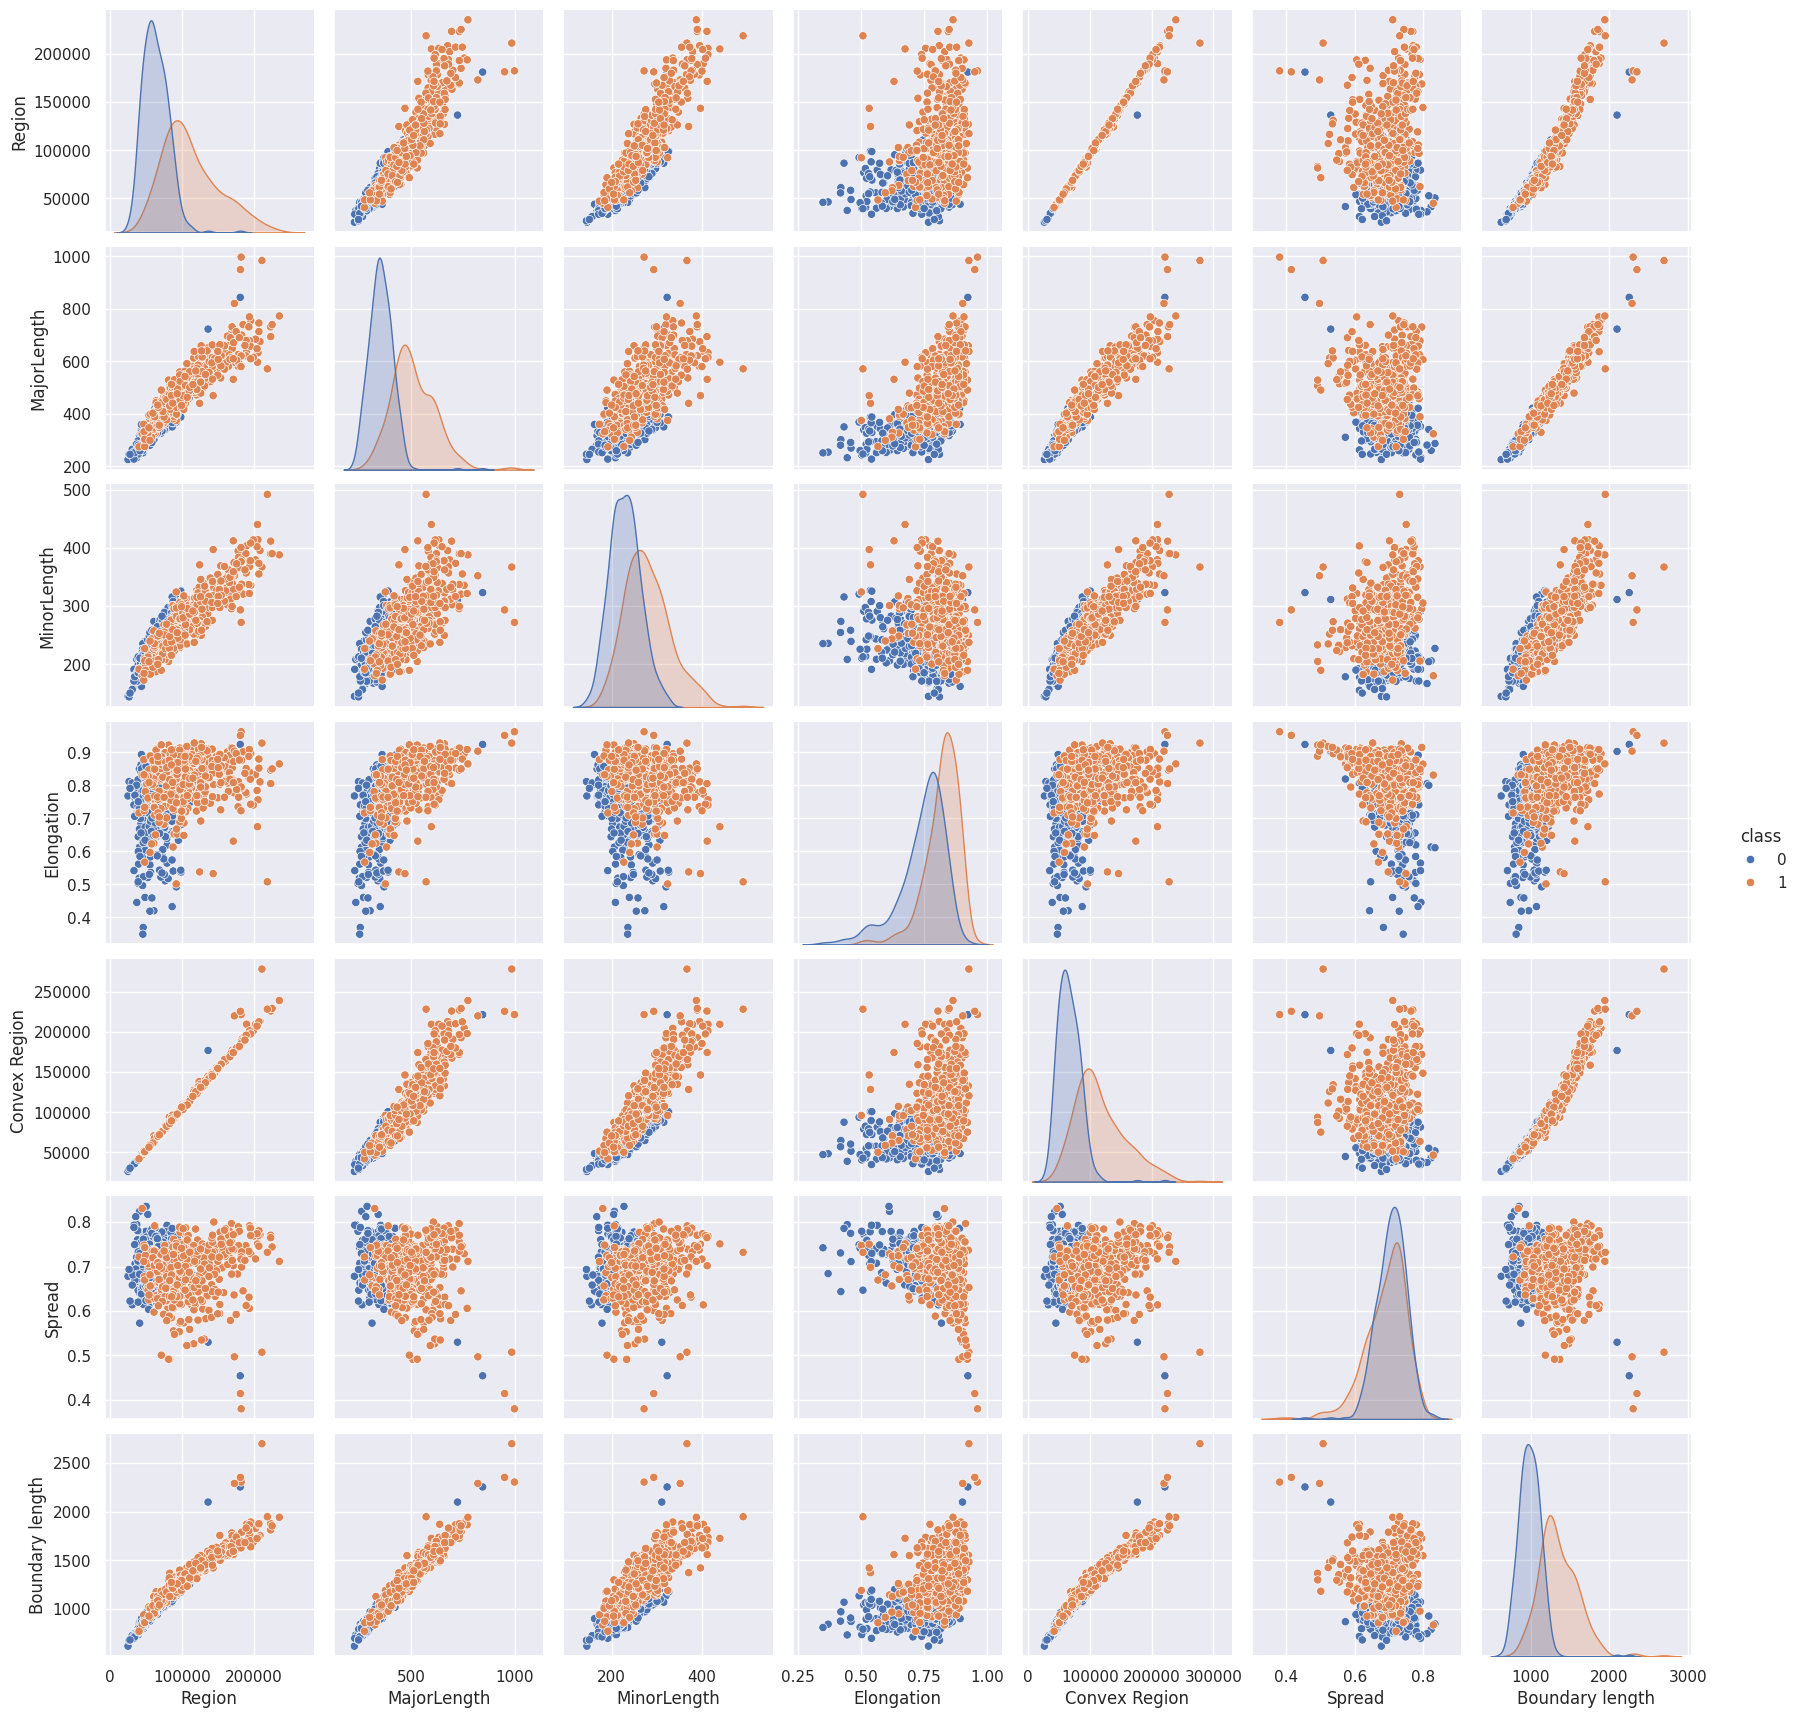

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

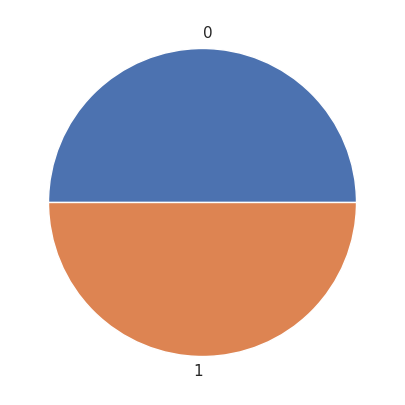

In [10]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['class'])
X.head(10)

Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0   87524   442.246011   253.291155    0.819738          90546  0.758651   
1   75166   406.690687   243.032436    0.801805          78789  0.684130   
2   90856   442.267048   266.328318    0.798354          93717  0.637613   
3   45928   286.540559   208.760042    0.684989          47336  0.699599   
4   79408   352.190770   290.827533    0.564011          81463  0.792772   
5   49242   318.125407   200.122120    0.777351          51368  0.658456   
6   42492   310.146072   176.131449    0.823099          43904  0.665894   
7   60952   332.455472   235.429835    0.706058          62329  0.743598   
8   42256   323.189607   172.575926    0.845499          44743  0.698031   
9   64380   366.964842   227.771615    0.784056          66125  0.664376   

   Boundary length  
0         1184.040  
1         1121.786  
2         1208.575  
3          844.162  
4         1073.251  
5          881.836  
6          823.796  
7          933.366  
8          849.728  
9          981.544

In [12]:
X.describe().transpose()

count          mean           std           min  \
Region           900.0  87804.127778  39002.111390  25387.000000   
MajorLength      900.0    430.929950    116.035121    225.629541   
MinorLength      900.0    254.488133     49.988902    143.710872   
Elongation       900.0      0.781542      0.090318      0.348730   
Convex Region    900.0  91186.090000  40769.290132  26139.000000   
Spread           900.0      0.699508      0.053468      0.379856   
Boundary length  900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Region           59348.000000  78902.000000  105028.250000  235047.000000  
MajorLength        345.442898    407.803951     494.187014     997.291941  
MinorLength        219.111126    247.848409     279.888575     492.275279  
Elongation           0.741766      0.798846       0.842571       0.962124  
Convex Region    61513.250000  81651.000000  108375.750000  278217.000000  
Spread               0.670869      0.707367       0.734991       0.835455  
Boundary length    966.410750   1119.509000    1308.389750    2697.753000

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0 -0.007186     0.097577    -0.023958    0.423142      -0.015709  1.106743   
1 -0.324217    -0.209012    -0.229292    0.224476      -0.304248 -0.287777   
2  0.078292     0.097758     0.236988    0.186239       0.062113 -1.158250   
3 -1.074286    -1.245051    -0.915273   -1.069623      -1.076165  0.001711   
4 -0.215393    -0.678958     0.727354   -2.409827      -0.238623  1.745259   
5 -0.989269    -0.972699    -1.088166   -0.046427      -0.977212 -0.768202   
6 -1.162433    -1.041504    -1.568353    0.460367      -1.160393 -0.629029   
7 -0.688862    -0.849133    -0.381463   -0.836226      -0.708208  0.825066   
8 -1.168487    -0.929031    -1.639519    0.708518      -1.139802 -0.027639   
9 -0.600920    -0.551563    -0.534746    0.027845      -0.615047 -0.657433   

   Boundary length  
0         0.066274  
1        -0.161252  
2         0.155945  
3        -1.175915  
4        -0.338639  
5        -1.038224  
6        -1.250349  
7        -0.849891  
8        -1.155572  
9        -0.673810

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Region           900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorLength      900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorLength      900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Elongation       900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
Convex Region    900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Spread           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Boundary length  900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Region           0.441866  3.777353  
MajorLength      0.545458  4.883667  
MinorLength      0.508404  4.759444  
Elongation       0.676084  2.000508  
Convex Region    0.421867  4.590095  
Spread           0.664006  2.543983  
Boundary length  0.520748  5.598604

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

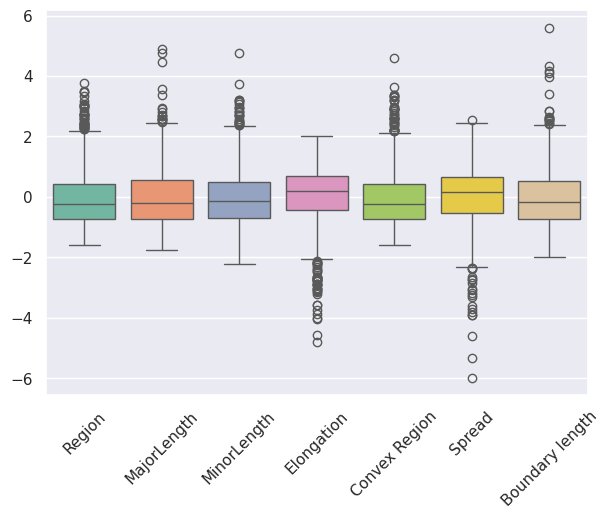

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

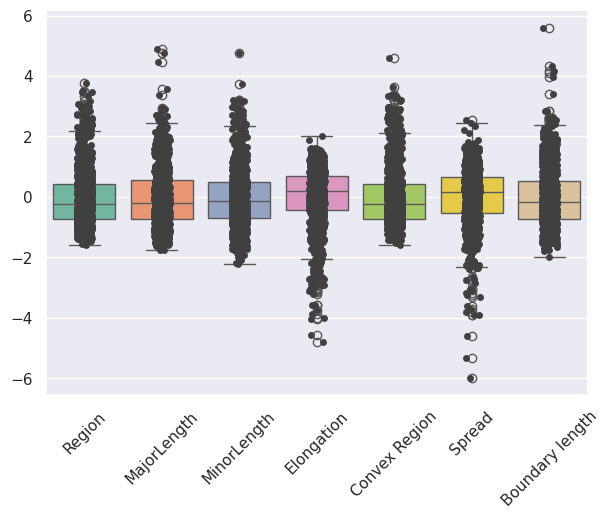

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

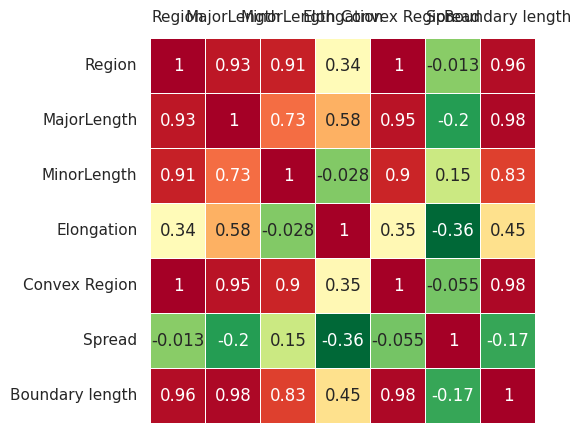

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

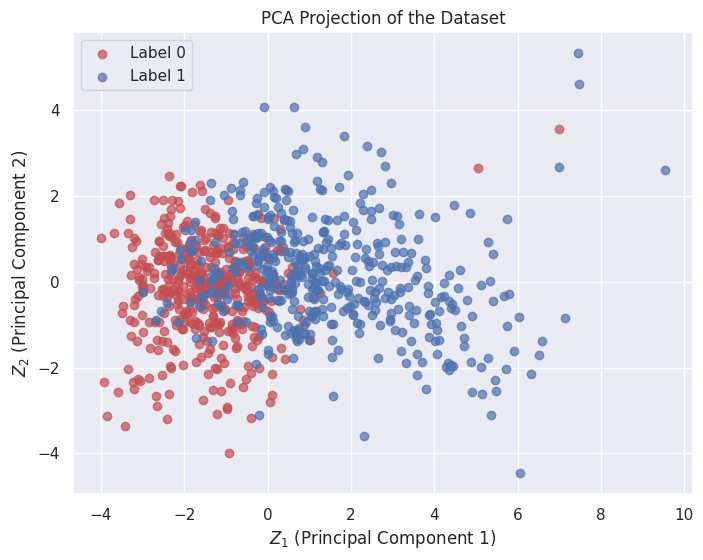

In [19]:

pca = PCA()
Z = pca.fit_transform(X)

# Identify indices for the two classes
idx_label_0 = np.where(y == 0)
idx_label_1 = np.where(y == 1)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(Z[idx_label_0, 0], Z[idx_label_0, 1], c='r', label='Label 0', alpha=0.7)
plt.scatter(Z[idx_label_1, 0], Z[idx_label_1, 1], c='b', label='Label 1', alpha=0.7)

plt.legend()
plt.xlabel('$Z_1$ (Principal Component 1)')
plt.ylabel('$Z_2$ (Principal Component 2)')
plt.title('PCA Projection of the Dataset')
plt.grid(True)

**Eigenvectors**

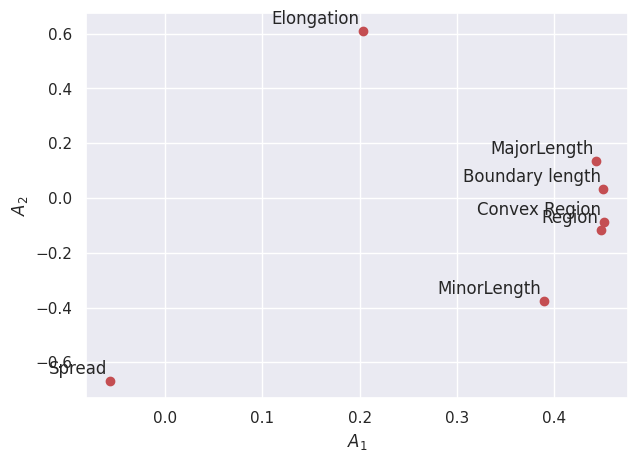

In [20]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

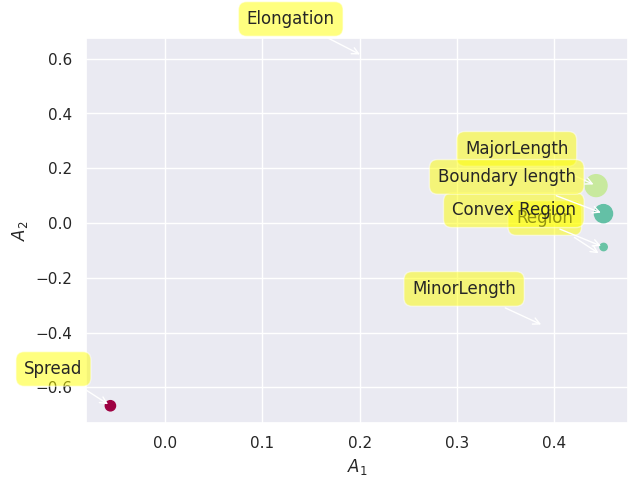

In [21]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

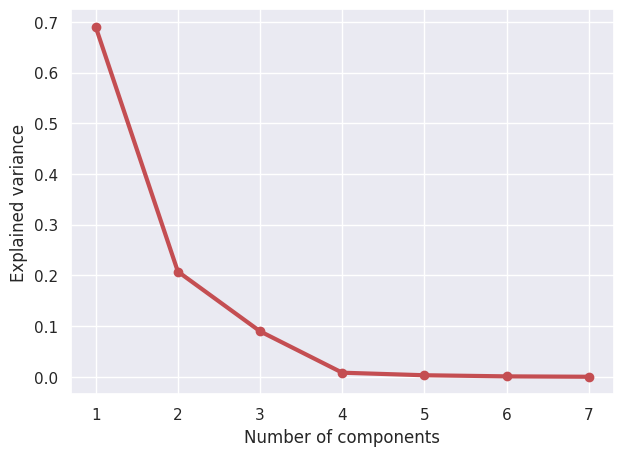

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

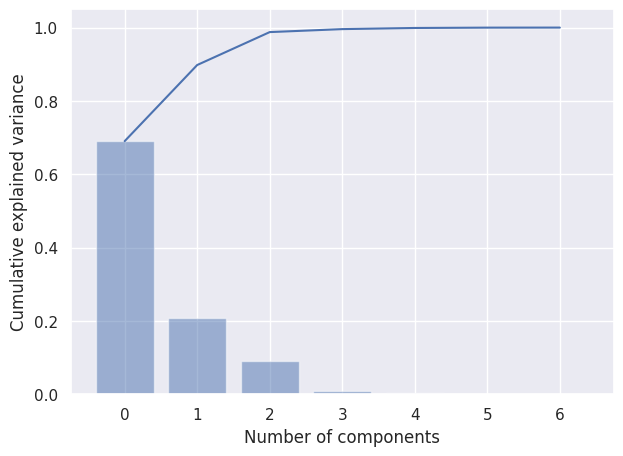

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [24]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (69.0%)',
 '1': 'PC 2 (20.8%)',
 '2': 'PC 3 (9.0%)',
 '3': 'PC 4 (0.8%)',
 '4': 'PC 5 (0.3%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.0%)'}

**Biplot**

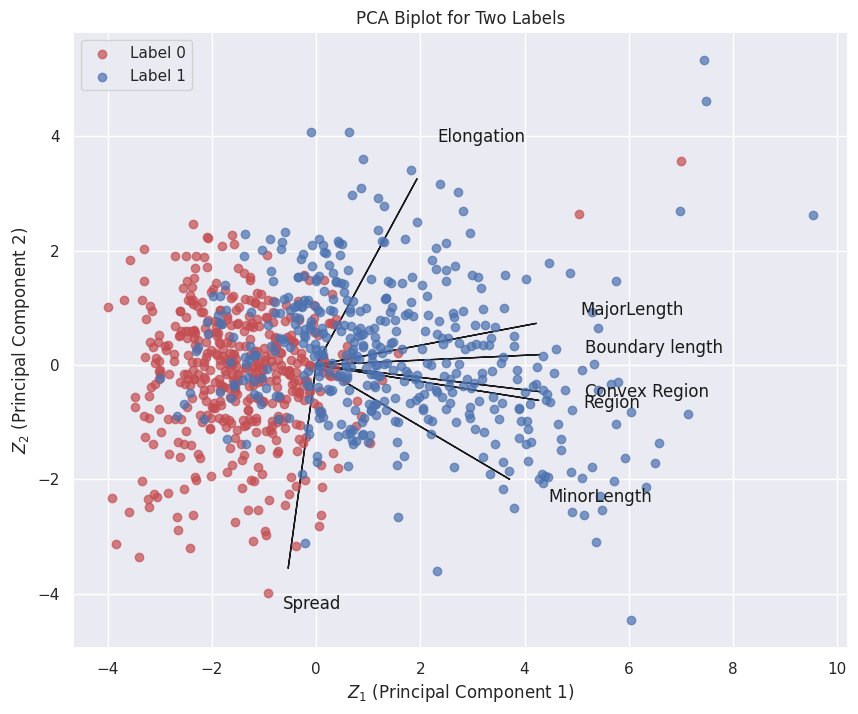

In [25]:
A1 = A[:, 0]  # Loadings for PC1
A2 = A[:, 1]  # Loadings for PC2
Z1 = Z[:, 0]  # Data projection on PC1
Z2 = Z[:, 1]  # Data projection on PC2

# Plotting
plt.figure(figsize=(10, 8))
plt.xlabel('$Z_1$ (Principal Component 1)')
plt.ylabel('$Z_2$ (Principal Component 2)')

# Plot feature vectors
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i] * max(Z1), A2[i] * max(Z2), color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i] * max(Z1) * 1.2, A2[i] * max(Z2) * 1.2, variables[i], color='k')

# Scatter plot for two labels
plt.scatter(Z[idx_label_0, 0], Z[idx_label_0, 1], c='r', label='Label 0', alpha=0.7)
plt.scatter(Z[idx_label_1, 0], Z[idx_label_1, 1], c='b', label='Label 1', alpha=0.7)

# Legend
plt.legend(loc='upper left')
plt.title('PCA Biplot for Two Labels')
plt.grid(True)

# Uncomment to annotate points if needed
# for i in range(len(Z1)):
#     plt.text(Z1[i] * 1.2, Z2[i] * 1.2, f'Point {i+1}', color='b')

plt.show()

##**Using PCA Library**

In [26]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

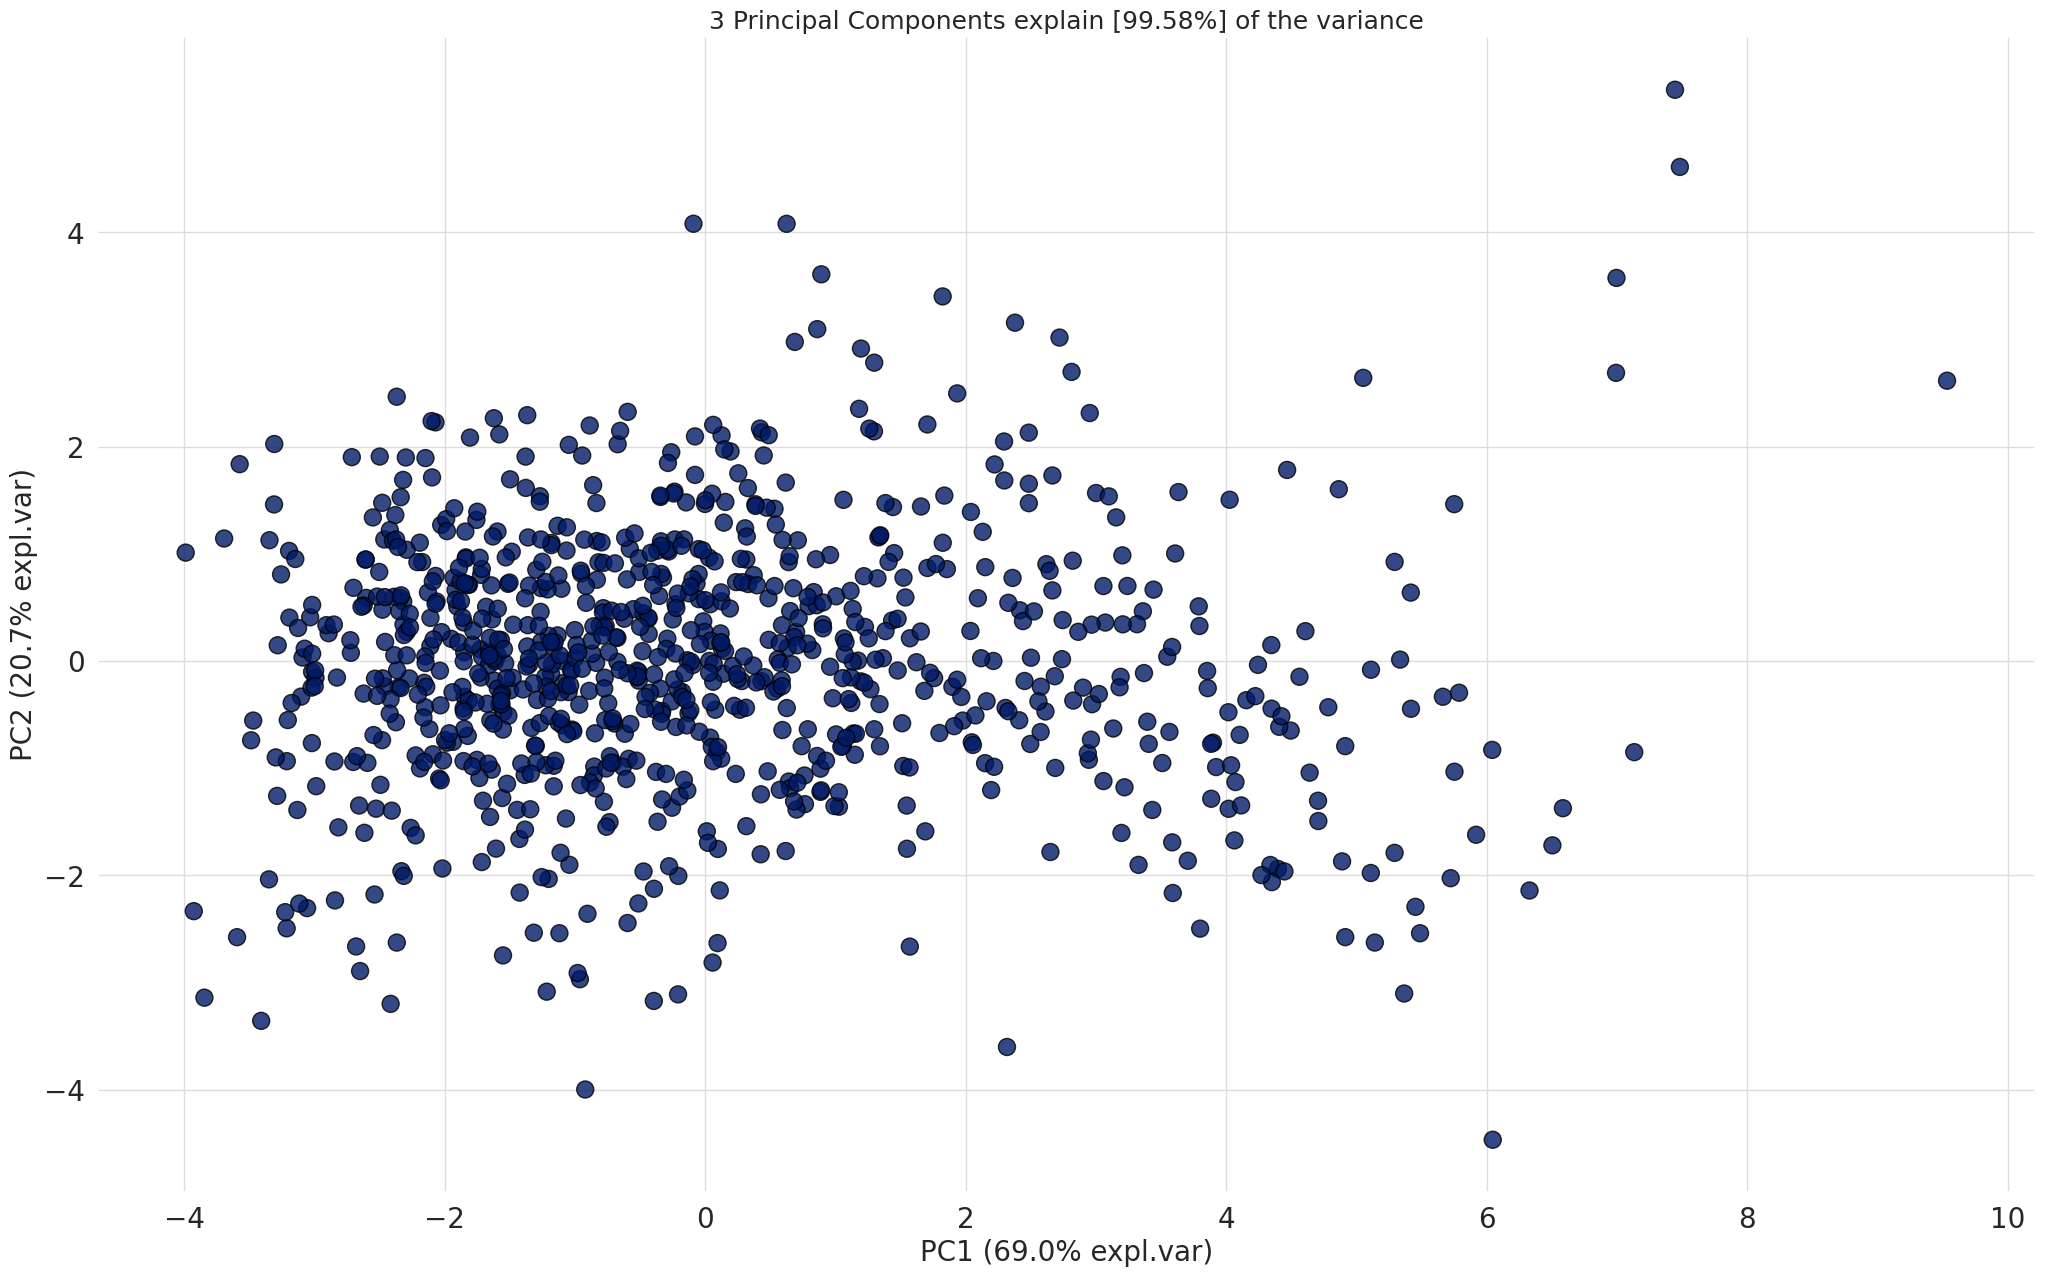

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T

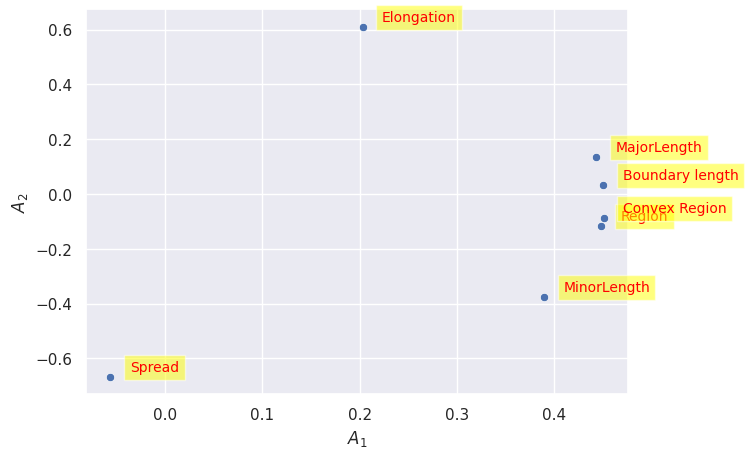

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

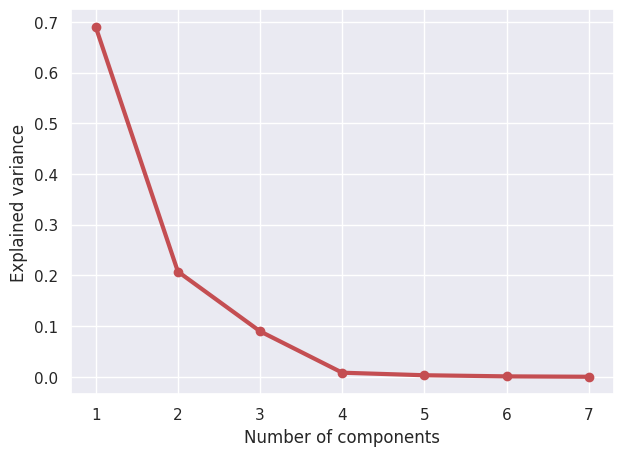

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

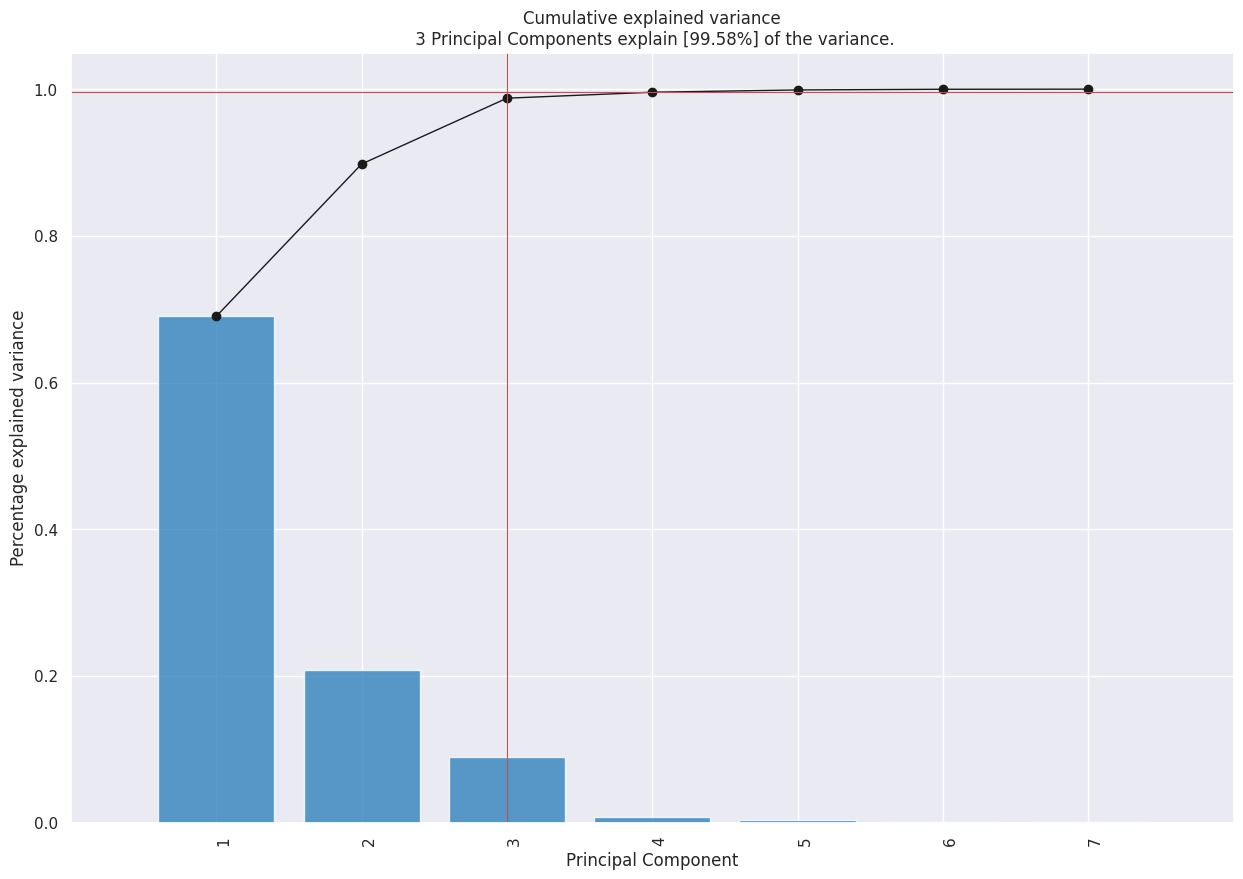

In [33]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

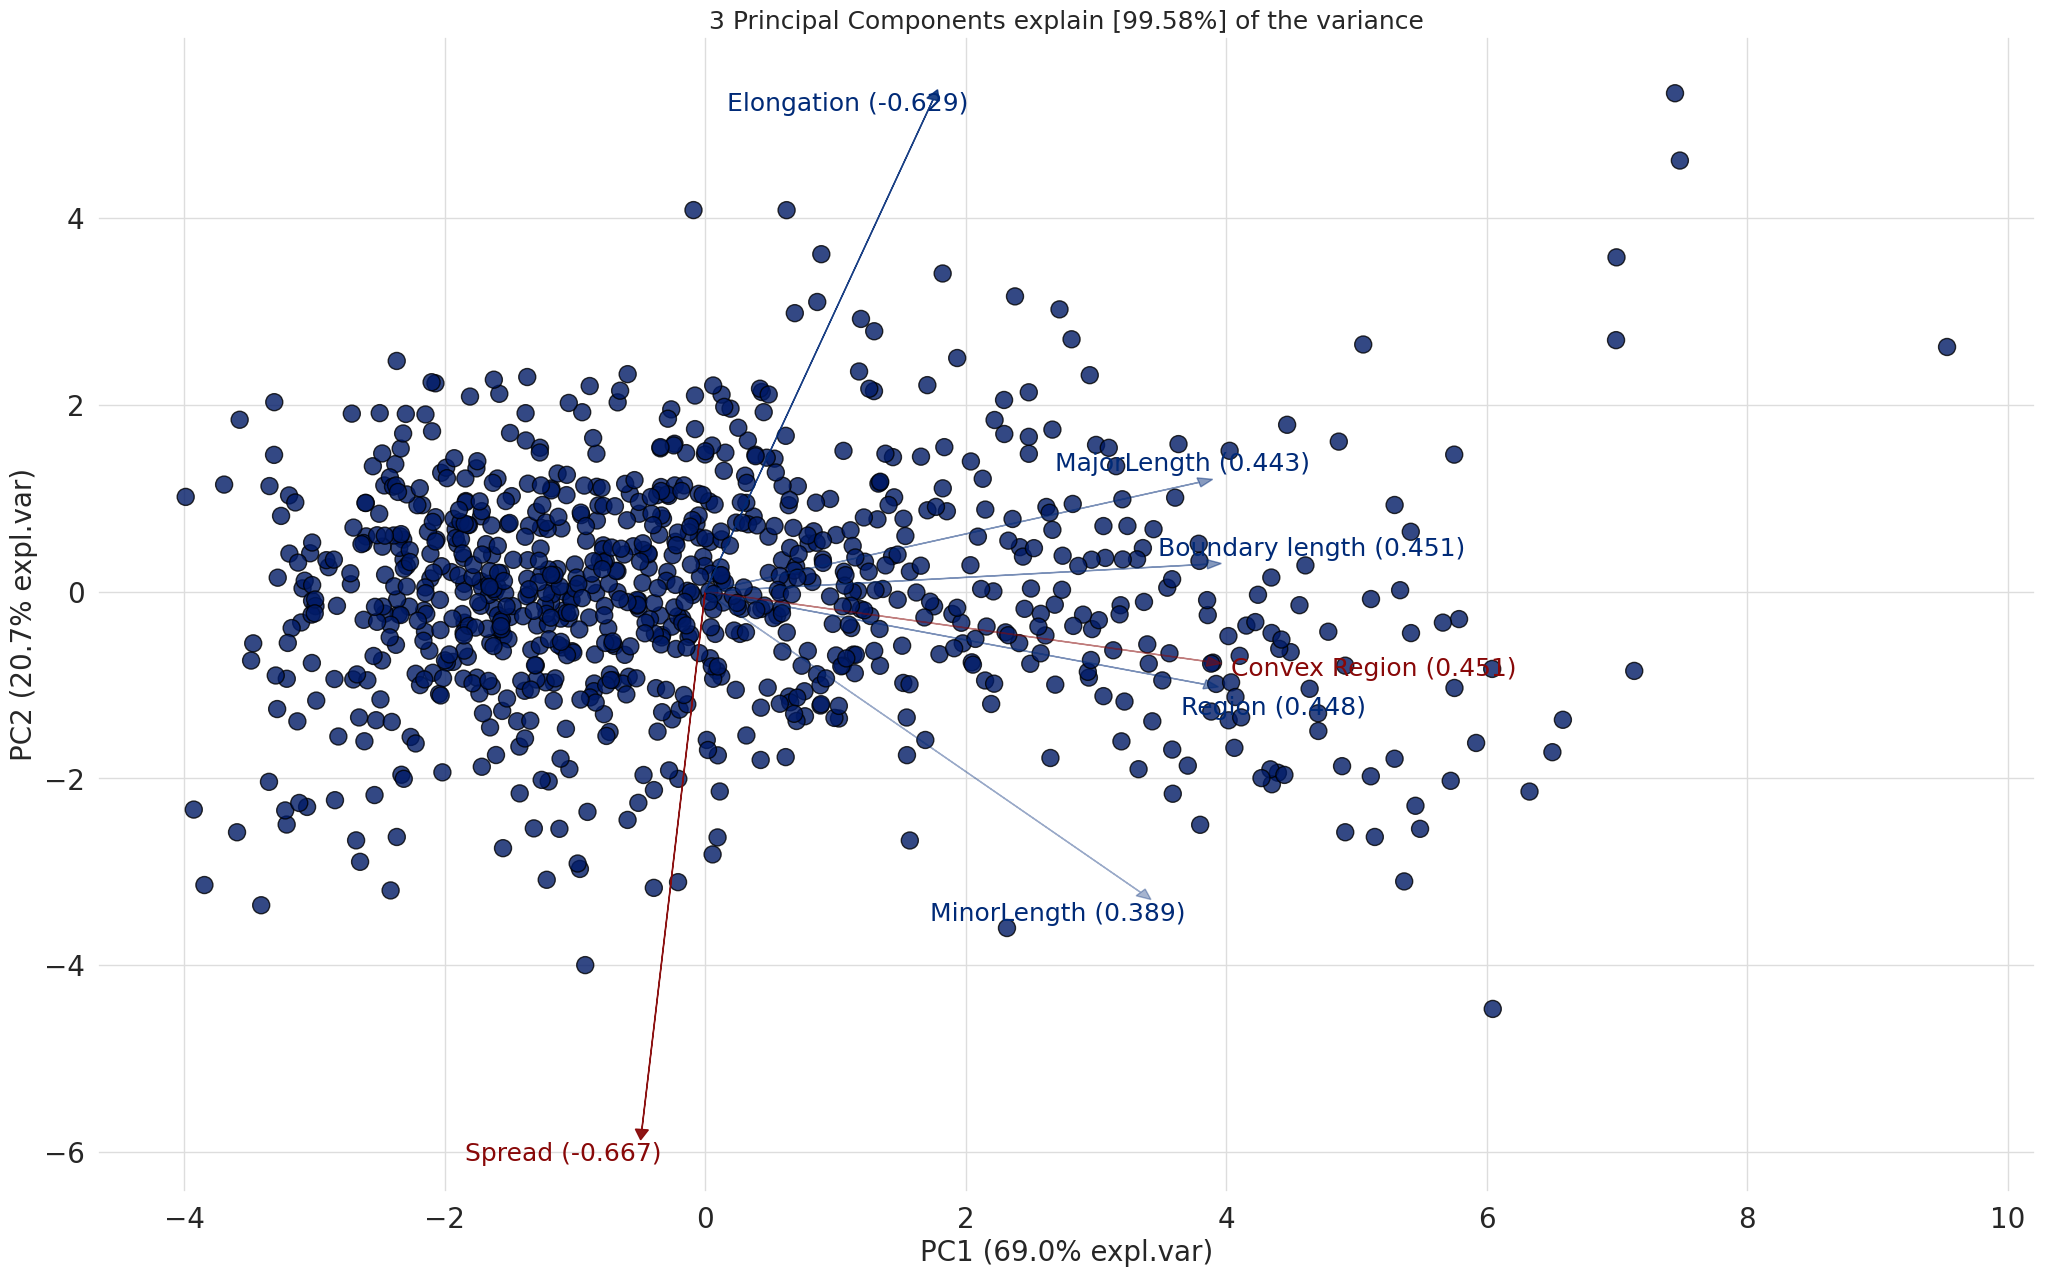

In [34]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [35]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [36]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [37]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [38]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [39]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [41]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')



```
`# This is formatted as code`
```

How to analyze model performance using various plots

**Evaluate Decision Tree Model**

In [43]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [44]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [45]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate K Neighbors Model**

In [46]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discrimenant QDA Analysis**

In [47]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA**

In [48]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate QDA**

In [49]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Linear Discrimant Analysis LDA**

In [50]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune LDA**

In [51]:
tune_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaulate LDA**

In [52]:
evaluate_model(tune_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random foest Model**

In [88]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [89]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune Random Forest Model**

In [90]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

In [91]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [60]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [61]:
tuned_best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [62]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [63]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [64]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**LDA after PCA**

In [74]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Linear Discriminant Analysis**

In [75]:
tuned_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluation LDA after PCA**

In [76]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**RF after PCA**

In [85]:
rf= create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**RF Tuned**

In [86]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate RF**

In [87]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**QDA after PCA**

In [71]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA**

In [72]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA**

In [73]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [78]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [82]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

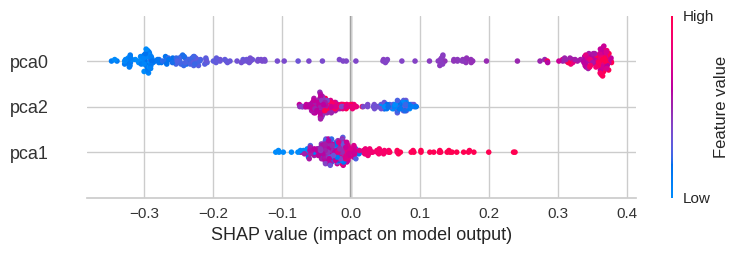

In [84]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')